# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# ******************************************************************************
# Dependencies and Setup
# ******************************************************************************
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt     
import openweathermapy.core as owm

# ******************************************************************************
# Import API key
# ******************************************************************************
from api_keys import api_key

# ******************************************************************************
# Incorporated citipy to determine city based on latitude and longitude
# ******************************************************************************
from citipy import citipy

# ******************************************************************************
# Output File (CSV)
# ******************************************************************************
output_data_file = "output_data/cities.csv"

# ******************************************************************************
# Range of latitudes and longitudes
# ******************************************************************************
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# ******************************************************************************
# List for holding lat_lngs and cities
# ******************************************************************************
lat_lngs = []
cities = []

# ******************************************************************************
# Create a set of random lat and lng combinations
# ******************************************************************************
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# ******************************************************************************
# Identify nearest city for each lat, lng combination
# ******************************************************************************
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# ******************************************************************************
# Print the city count to confirm sufficient count
# ******************************************************************************
len(cities)

653

In [3]:
# ******************************************************************************
# Print the list of cities in the collection.
# ******************************************************************************
print(cities)

['normandin', 'bintulu', 'wawa', 'kearney', 'shingu', 'san patricio', 'esna', 'mataura', 'comodoro rivadavia', 'pavlovskiy', 'maragogi', 'ancud', 'coolum beach', 'songjianghe', 'souillac', 'inta', 'petropavlovsk-kamchatskiy', 'thompson', 'albany', 'punta arenas', 'pontes e lacerda', 'jabinyanah', 'mahebourg', 'rikitea', 'half moon bay', 'busselton', 'yishui', 'puerto madryn', 'kaitangata', 'saint george', 'bluff', 'hermanus', 'halalo', 'paranga', 'vaini', 'sunrise manor', 'kodiak', 'bonavista', 'baghdad', 'kapaa', 'gamba', 'vila velha', 'qaqortoq', 'avarua', 'georgetown', 'verkhoyansk', 'thunder bay', 'bredasdorp', 'acapulco', 'butaritari', 'lebu', 'hasaki', 'jamestown', 'tynda', 'saskylakh', 'ushuaia', 'beringovskiy', 'maningrida', 'ribeira grande', 'samusu', 'villazon', 'buala', 'port hardy', 'inirida', 'vyartsilya', 'astana', 'castro', 'tiksi', 'akranes', 'bandundu', 'taolanaro', 'camacha', 'khatanga', 'lagoa', 'santa helena de goias', 'sinnar', 'barrow', 'bandarbeyla', 'aswan', 'di

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# ******************************************************************************
# Create an empty list to store the weather responses
# ******************************************************************************
response_json = []

In [5]:
# ******************************************************************************
# Create settings dictionary with information needed for this analysis
# ******************************************************************************
settings = {"units": "imperial", "appid": api_key}

# ******************************************************************************
# Create a list of fields to pull from the results
# ******************************************************************************
summary = ["id", "name", "clouds.all", "sys.country", "dt", "main.humidity", 
           "coord.lat", "coord.lon", "main.temp_max", "wind.speed"]

# ******************************************************************************
# Create and initialize variables needed to flag when a city does not provide a 
# response and to track the number of invalid cities
# ******************************************************************************
city_found = True
invalid_city_count = 0


In [6]:
# ******************************************************************************
# Print the header for processing the cities in the list
# ******************************************************************************
print("---------------------------------------")
print("Beginning Data Retrieval")
print("---------------------------------------")

# ******************************************************************************
# Loop through the cities in teh list and pull the data for each city. Store the 
# data in the response array
# ******************************************************************************
for x in range(len(cities)):
    # **************************************************************************
    # Print a message to show which city is being processed.
    # **************************************************************************
    print(f"Making request number: {x} for {cities[x]}")

    # **************************************************************************
    # Use error handling to pull the weather data for a specific city in the 
    # list. If there is an error, set the flag so the city is skipped.
    # **************************************************************************
    try:
        current_weather = owm.get_current(cities[x], **settings)
    except:
        city_found = False
    
    # **************************************************************************
    # If there was not an error retreiving the data, capture the data in an 
    # object and add it to the response list.
    # **************************************************************************
    if city_found:
        data = current_weather(*summary)

        this_city = {"id": data[0], 
                   "name": data[1], 
                   "clouds": data[2], 
                   "country": data[3], 
                   "date": data[4], 
                   "humidity": data[5], 
                   "lat": data[6], 
                   "lon": data[7], 
                   "temp_max": data[8], 
                   "wind_speed": data[9]}

        response_json.append(this_city)
    # **************************************************************************
    # If there was an error retreiving the data, print a message and do not 
    # store this city in teh response list.
    # **************************************************************************
    else:
        print(f"City ({cities[x]}) not found. Skipping...")
        invalid_city_count += 1

    # **************************************************************************
    # Reset the flag for processing the next city 
    # **************************************************************************
    city_found = True
    
    
# ******************************************************************************
# Print a message to indicate the end of processing
# ******************************************************************************
print("---------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------")


---------------------------------------
Beginning Data Retrieval
---------------------------------------
Making request number: 0 for normandin
Making request number: 1 for bintulu
Making request number: 2 for wawa
Making request number: 3 for kearney
Making request number: 4 for shingu
Making request number: 5 for san patricio
Making request number: 6 for esna
Making request number: 7 for mataura
Making request number: 8 for comodoro rivadavia
Making request number: 9 for pavlovskiy
Making request number: 10 for maragogi
Making request number: 11 for ancud
Making request number: 12 for coolum beach
Making request number: 13 for songjianghe
Making request number: 14 for souillac
Making request number: 15 for inta
Making request number: 16 for petropavlovsk-kamchatskiy
Making request number: 17 for thompson
Making request number: 18 for albany
Making request number: 19 for punta arenas
Making request number: 20 for pontes e lacerda
Making request number: 21 for jabinyanah
Making request

City (louisbourg) not found. Skipping...
Making request number: 187 for mys shmidta
City (mys shmidta) not found. Skipping...
Making request number: 188 for dunda
Making request number: 189 for filadelfia
Making request number: 190 for alekseyevsk
Making request number: 191 for rio gallegos
Making request number: 192 for hauterive
Making request number: 193 for srednebelaya
Making request number: 194 for leh
Making request number: 195 for chokurdakh
Making request number: 196 for rudozem
Making request number: 197 for sitka
Making request number: 198 for salinas
Making request number: 199 for kalmunai
Making request number: 200 for karnal
Making request number: 201 for rudbar
City (rudbar) not found. Skipping...
Making request number: 202 for ibra
Making request number: 203 for kushmurun
City (kushmurun) not found. Skipping...
Making request number: 204 for mugumu
Making request number: 205 for bitung
Making request number: 206 for grand forks
Making request number: 207 for wattegama
M

Making request number: 374 for flinders
Making request number: 375 for labuhan
Making request number: 376 for isangel
Making request number: 377 for sembakung
Making request number: 378 for touros
Making request number: 379 for havre-saint-pierre
Making request number: 380 for samagaltay
Making request number: 381 for teya
Making request number: 382 for mandalgovi
Making request number: 383 for santa maria
Making request number: 384 for kemijarvi
City (kemijarvi) not found. Skipping...
Making request number: 385 for fenoarivo
Making request number: 386 for seoul
Making request number: 387 for mildura
Making request number: 388 for sao joao da barra
Making request number: 389 for najran
Making request number: 390 for ust-maya
Making request number: 391 for ternate
Making request number: 392 for grand-lahou
Making request number: 393 for tabou
Making request number: 394 for baruun-urt
Making request number: 395 for parys
Making request number: 396 for acari
Making request number: 397 for

Making request number: 555 for shimoda
Making request number: 556 for northborough
Making request number: 557 for salinopolis
Making request number: 558 for necochea
Making request number: 559 for bosaso
Making request number: 560 for moose factory
Making request number: 561 for waingapu
Making request number: 562 for ostersund
Making request number: 563 for colares
Making request number: 564 for zapolyarnyy
Making request number: 565 for pueblo nuevo
Making request number: 566 for lavrentiya
Making request number: 567 for puerto escondido
Making request number: 568 for tres picos
Making request number: 569 for mount isa
Making request number: 570 for cabedelo
Making request number: 571 for san javier
Making request number: 572 for bodden town
Making request number: 573 for bumba
Making request number: 574 for turukhansk
Making request number: 575 for nguiu
City (nguiu) not found. Skipping...
Making request number: 576 for urumqi
City (urumqi) not found. Skipping...
Making request numb

In [7]:
# ******************************************************************************
# Print the processing statistics
# ******************************************************************************
print(f"There are {invalid_city_count} invalid cities found in the original collection.")
print(f"There are {len(response_json)} valid cities in this collection.")


There are 66 invalid cities found in the original collection.
There are 587 valid cities in this collection.


In [8]:
# ******************************************************************************
# Print city data captured in the response collection.
# ******************************************************************************
response_json

[{'id': 6089179,
  'name': 'Normandin',
  'clouds': 90,
  'country': 'CA',
  'date': 1551888000,
  'humidity': 65,
  'lat': 48.84,
  'lon': -72.53,
  'temp_max': 6.8,
  'wind_speed': 16.11},
 {'id': 1737486,
  'name': 'Bintulu',
  'clouds': 75,
  'country': 'MY',
  'date': 1551888000,
  'humidity': 94,
  'lat': 3.17,
  'lon': 113.03,
  'temp_max': 78.8,
  'wind_speed': 2.24},
 {'id': 2319078,
  'name': 'Wawa',
  'clouds': 44,
  'country': 'NG',
  'date': 1551891072,
  'humidity': 32,
  'lat': 9.9,
  'lon': 4.41,
  'temp_max': 96.02,
  'wind_speed': 4.99},
 {'id': 5071348,
  'name': 'Kearney',
  'clouds': 90,
  'country': 'US',
  'date': 1551890742,
  'humidity': 73,
  'lat': 40.7,
  'lon': -99.08,
  'temp_max': 26.01,
  'wind_speed': 10.29},
 {'id': 1847947,
  'name': 'Shingu',
  'clouds': 100,
  'country': 'JP',
  'date': 1551891067,
  'humidity': 100,
  'lat': 33.72,
  'lon': 135.99,
  'temp_max': 55.7,
  'wind_speed': 22.55},
 {'id': 3437029,
  'name': 'San Patricio',
  'clouds': 12

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# ******************************************************************************
# Convert the response list to a dataframe and reorder the columns in the 
# dataframe. 
# ******************************************************************************
weather_df = pd.DataFrame(response_json)
organized_weather_df = weather_df[["id", "name", "country", "date", "clouds", "humidity", 
                       "lat", "lon", "temp_max", "wind_speed"]]

In [10]:
# ******************************************************************************
# Print initial count of rows in this dataframe.
# ******************************************************************************
print(f"Initial Rows count = {organized_weather_df.shape[0]}")
# ******************************************************************************
# Remove projects that have Cloudiness > 100%
# ******************************************************************************
reduced_weather_df = organized_weather_df.loc[(organized_weather_df["clouds"] < 101)]
print(f"After removing Cloudiness > 100% = {reduced_weather_df.shape[0]}")

# ******************************************************************************
# Remove projects that have Humidity > 100%
# ******************************************************************************
reduced_weather_df = reduced_weather_df.loc[(reduced_weather_df["humidity"] < 101)]
print(f"After removing Humidity > 100% = {reduced_weather_df.shape[0]}")


Initial Rows count = 587
After removing Cloudiness > 100% = 587
After removing Humidity > 100% = 586


In [11]:
# ******************************************************************************
# Capture today's date so it can be added to the header of the graphs
# ******************************************************************************
todays_date = dt.datetime.today().strftime("%m/%d/%Y")


In [12]:
# ******************************************************************************
# Export file as a CSV, without the Pandas index, but with the header
# ******************************************************************************
reduced_weather_df.to_csv(output_data_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

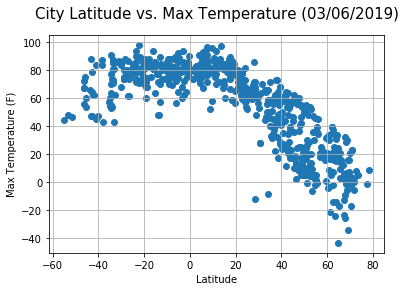

In [13]:
# ******************************************************************************
# Build a City Latitude vs. Max Temperature scatter plot
# ******************************************************************************
plt.scatter(reduced_weather_df["lat"], reduced_weather_df["temp_max"], marker="o")

# ******************************************************************************
# Define the title, x and y axis labels
# ******************************************************************************
plot_header = "City Latitude vs. Max Temperature (" + todays_date + ")"
plt.title(plot_header, y=1.05, fontsize=15)
plt.xlabel("Latitude", y=1.05, fontsize=10)
plt.ylabel("Max Temperature (F)", fontsize=10)

# ******************************************************************************
# Add a grid, save the graph to a file and display the graph
# ******************************************************************************
plt.grid()
plt.savefig("output_data/Lat_vs_Max_Temp.png")
plt.show()


#### Latitude vs. Humidity Plot

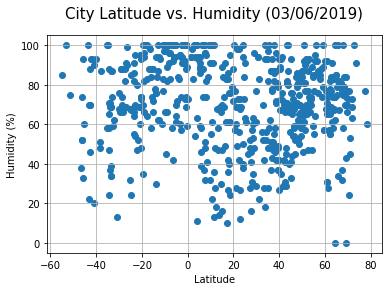

In [14]:
# ******************************************************************************
# Build a City Latitude vs. Humidity scatter plot
# ******************************************************************************
plt.scatter(reduced_weather_df["lat"], reduced_weather_df["humidity"], marker="o")

# ******************************************************************************
# Define the title, x and y axis labels
# ******************************************************************************
plot_header = "City Latitude vs. Humidity (" + todays_date + ")"
plt.title(plot_header, y=1.05, fontsize=15)
plt.xlabel("Latitude", y=1.05, fontsize=10)
plt.ylabel("Humidity (%)", fontsize=10)

# ******************************************************************************
# Add a grid, save the graph to a file and display the graph
# ******************************************************************************
plt.grid()
plt.savefig("output_data/Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

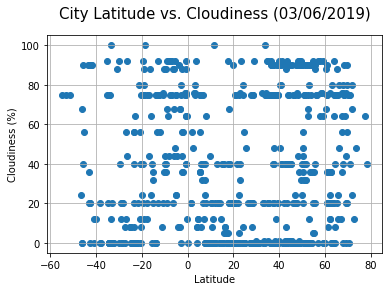

In [15]:
# ******************************************************************************
# Build a City Latitude vs. Cloudiness scatter plot
# ******************************************************************************
plt.scatter(reduced_weather_df["lat"], reduced_weather_df["clouds"], marker="o")

# ******************************************************************************
# Define the title, x and y axis labels
# ******************************************************************************
plot_header = "City Latitude vs. Cloudiness (" + todays_date + ")"
plt.title(plot_header, y=1.05, fontsize=15)
plt.xlabel("Latitude", y=1.05, fontsize=10)
plt.ylabel("Cloudiness (%)", fontsize=10)

# ******************************************************************************
# Add a grid, save the graph to a file and display the graph
# ******************************************************************************
plt.grid()
plt.savefig("output_data/Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

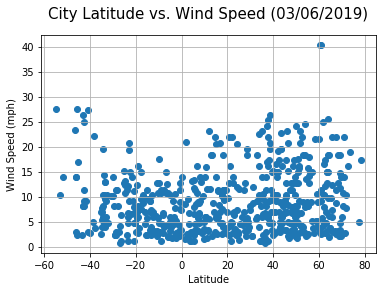

In [16]:
# ******************************************************************************
# Build a City Latitude vs. Wind Speed scatter plot
# ******************************************************************************
plt.scatter(reduced_weather_df["lat"], reduced_weather_df["wind_speed"], marker="o")

# ******************************************************************************
# Define the title, x and y axis labels
# ******************************************************************************
plot_header = "City Latitude vs. Wind Speed (" + todays_date + ")"
plt.title(plot_header, y=1.05, fontsize=15)
plt.xlabel("Latitude", y=1.05, fontsize=10)
plt.ylabel("Wind Speed (mph)", fontsize=10)

# ******************************************************************************
# Add a grid, save the graph to a file and display the graph
# ******************************************************************************
plt.grid()
plt.savefig("output_data/Lat_vs_Wind_Speed.png")
plt.show()